<a href="https://colab.research.google.com/github/zuhaib786/Disconinuity-Identification-in-Numerical-solutions-of-DEs/blob/main/1D_Discontinuity_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONSTRUCTION OF A UNIVERSAL DISCONTINUITY DETECTOR USING CONVOLUTION NEURAL NETWORKS
This notebook is for generation of 1D-discontinuity data given in the paper mentioned in the title<br>
The generated data will be used for training a Convolutional Neural Network(CNN)<br>
Trained CNN works very well for the data that is generated using this method<br>
<span style="color:blue"> Need to look at the performance of the trained model when input is the data generated from a numerical scheme</span> <br>



# Data Generation

In [ ]:
import numpy as np
import pandas as pd
import math
import random
class DiscontDataGenerator:
  def __init__(self, pts = 201, N_F = 15):
    self.M = 5
    self.pts = pts
    self.D = list(np.linspace(-1,1,pts))
    self.N_F = N_F
  def Fourier(self):
    data = []
    for i in range(self.N_F):
      data.append(list(np.random.normal(0, 1, 2)))
    return data
  def calc(self, data, x):
    ans = 0
    for i, tup in enumerate(data):
      a, b = tup
      ans += a * np.cos((i + 1) * x) + b * np.sin((i + 1)*x)
    return ans
  def generate(self):
    discont = np.random.randint(0,self.M )
    points = random.sample(self.D[1:-1], discont)
    points.sort()
    i = 0 
    temp , label = [], []
    data = self.Fourier()
    for j in self.D:
      if i< discont and j >= points[i]:
        label.append(1)
        i += 1
        data = self.Fourier()
      else:
        label.append(0)
      temp.append(self.calc(data, j))
    return temp, label[1:]
      




In [ ]:
a = DiscontDataGenerator()

Press Enter:


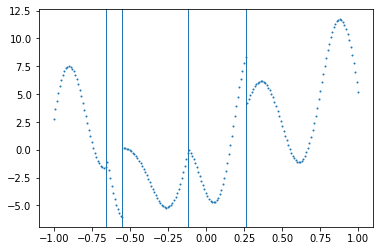

Press Enter:


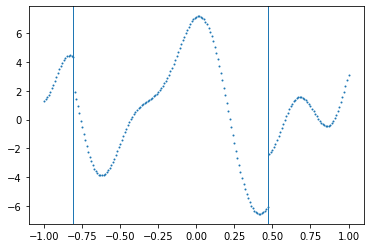

Press Enter:


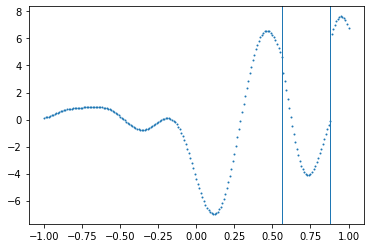

Press Enter:


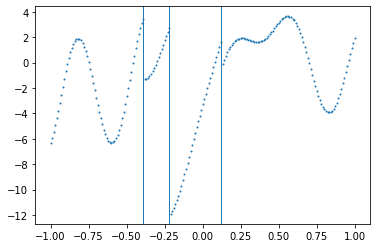

Press Enter:


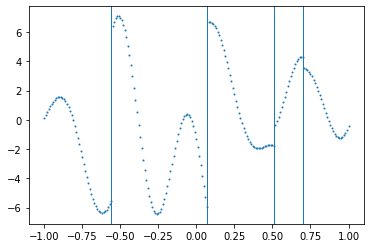

Press Enter:


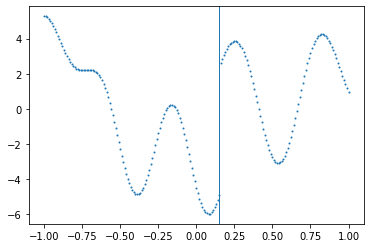

Press Enter:


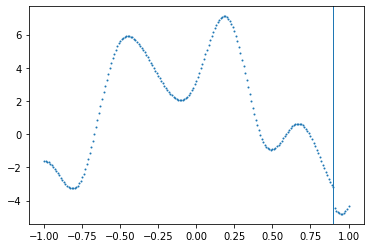

Press Enter:


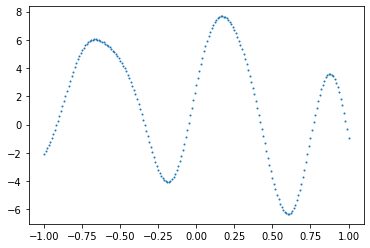

Press Enter:


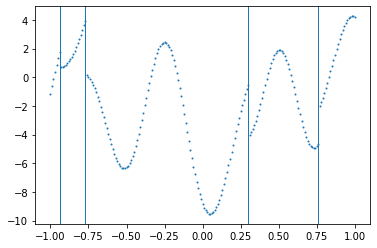

Press Enter:


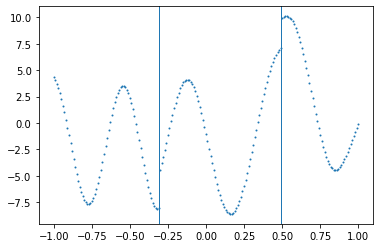

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
  input("Press Enter:")
  data, label = a.generate()
  x = list(np.linspace(-1, 1, 201))
  plt.scatter(x, data, s = 1)
  x = x[:-1]
  for i in range(len(x)):
    if label[i] == 1:
      plt.axvline(x[i], linewidth = 1)
  # plt.plot(x, label)
  plt.show()

In [ ]:
plt.axvline??

In [ ]:
Di = {}
for i in range(201):
  Di[i] = []
yDi = {}
for i in range(200):
  yDi[i] = []

In [ ]:
xdf = pd.DataFrame.from_dict(Di)
ydf = pd.DataFrame.from_dict(yDi)

In [ ]:
from tqdm import tqdm
for i in tqdm(range(100000)):
  data, label = a.generate()
  xdf.loc[i] = data
  ydf.loc[i] = label
  

 52%|█████▏    | 51996/100000 [34:50<32:10, 24.87it/s]


KeyboardInterrupt: ignored

In [ ]:
xdf

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,4.177173,4.593735,5.020929,5.453859,5.887436,6.316460,6.735708,7.140014,7.524356,7.883938,...,-1.046727,-1.654257,-2.317219,-3.026040,-3.770101,-4.537903,-5.317263,-6.095516,-6.859736,-7.596964
1,-9.369195,-8.980574,-8.567581,-8.135398,-7.689225,-7.234204,-6.775337,-6.317419,-5.864966,-5.422156,...,5.332273,5.417316,5.472588,5.497061,5.489774,5.449876,5.376658,5.269591,5.128361,4.952909
2,-3.164926,-3.017594,-2.839179,-2.635431,-2.412726,-2.177934,-1.938284,-1.701215,-1.474230,-1.264740,...,0.923961,1.071539,1.186442,1.267925,1.315801,1.330411,1.312582,1.263583,1.185064,1.079006
3,1.201557,1.235219,1.237661,1.206570,1.140175,1.037306,0.897454,0.720803,0.508263,3.381105,...,1.861799,2.336091,2.797357,3.238780,3.653631,4.035360,4.377692,4.674721,4.921007,5.111664
4,-2.840480,-3.272119,-3.683944,-4.069054,-4.421153,-4.734666,-5.004836,-5.227810,-5.400697,-5.521612,...,3.098737,3.313762,3.506072,3.670890,3.803584,3.899787,3.955511,3.967256,3.932113,3.847857
5,2.491271,2.811240,3.079165,3.288882,3.435044,3.513214,3.519945,3.452853,3.310659,3.093225,...,2.918585,2.899309,2.882634,2.866678,2.849244,2.827881,2.799961,2.762748,2.713488,2.649484
6,-1.573663,-1.271924,-0.947019,-0.606539,-0.258011,0.091252,0.434287,0.764606,1.076312,1.364186,...,-0.596325,-0.836979,-1.037639,-1.195816,-1.309787,-1.378623,-1.402199,-1.381192,-1.317056,-1.211994
7,-3.483700,-3.750420,-3.986078,-4.184516,-4.340142,-4.448066,-4.504216,-4.505435,-4.449577,-4.335560,...,1.817628,2.166937,2.490783,2.785007,3.045817,3.269870,3.454340,3.596983,3.696183,3.750996
8,-1.500481,-1.892507,-2.250599,-2.569970,-2.846497,-3.076801,-3.258311,-3.389311,-3.468983,-3.497415,...,1.051319,0.782648,0.480032,0.148371,-0.206655,-0.578702,-0.960903,-1.346021,-1.726609,-2.095178
9,0.322084,0.435571,0.505144,0.529179,0.506991,0.438868,0.326069,0.170821,-0.023721,-0.253522,...,-0.510373,-0.434811,-0.318082,-0.154821,0.059573,0.328785,0.655450,1.041040,1.485773,1.988548


In [ ]:
len(xdf)

51997

In [ ]:
len(ydf)

51996

In [ ]:
xdf.drop(xdf.tail(1).index,inplace=True) # drop last n rows

In [ ]:
len(xdf)

51996

In [ ]:
data = xdf.iloc[1].values

In [ ]:
label = ydf.iloc[1].values

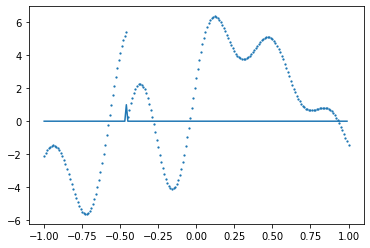

In [ ]:
xdf.to_csv("Data.csv")
ydf.to_csv("Label.csv")


In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
!cp /content/Data.csv -r /content/gdrive/MyDrive/COL334_Assignments

In [ ]:
!cp /content/Label.csv -r /content/gdrive/MyDrive/COL334_Assignments

In [ ]:
xdf = pd.read_csv('/content/gdrive/MyDrive/COL334_Assignments/Data.csv')

In [ ]:
ydf = pd.read_csv('/content/gdrive/MyDrive/COL334_Assignments/Label.csv')

In [ ]:
xdf.drop(columns = ['Unnamed: 0'], inplace = True)
ydf.drop(columns = ['Unnamed: 0'], inplace = True)

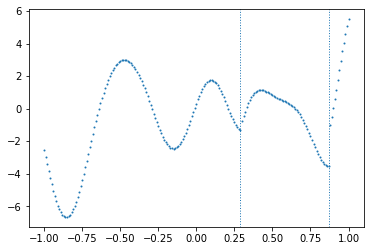

In [ ]:
M = 100
data  = xdf.iloc[M].values
data = data[1:]
label = ydf.iloc[M].values
label = label[1:]
x = np.linspace(-1, 1, 201)
plt.scatter(x, data, s= 1)
x  = x[:-1]
# plt.plot(x, label)
for i, val in enumerate(x):
  if label[i] == 1:
    plt.axvline(val, linewidth = 1, ls = ':')

plt.show()

# Model Implementation and Training

In [ ]:
import tensorflow as tf
from keras.layers import Conv1D, Dense, Input, Flatten
from keras.models import Sequential
def create_model(input_size=  201):
  inp = Input(shape = (input_size, 1))
  X = Conv1D(kernel_size = 2, filters = 24,activation = 'relu' )(inp)
  X = Conv1D(kernel_size = 2, filters = 24, activation = 'relu')(X)
  X = Conv1D(kernel_size = 2, filters = 24, activation = 'relu')(X)
  X = Conv1D(kernel_size = 2, filters = 24, activation = 'relu')(X)
  X = Flatten()(X)
  X = Dense(input_size- 1, activation = 'sigmoid')(X)
  model  = tf.keras.Model(inputs = inp, outputs = X)
  return model

In [ ]:
model = create_model()

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 201, 1)]          0         
                                                                 
 conv1d_4 (Conv1D)           (None, 200, 24)           72        
                                                                 
 conv1d_5 (Conv1D)           (None, 199, 24)           1176      
                                                                 
 conv1d_6 (Conv1D)           (None, 198, 24)           1176      
                                                                 
 conv1d_7 (Conv1D)           (None, 197, 24)           1176      
                                                                 
 flatten_1 (Flatten)         (None, 4728)              0         
                                                                 
 dense_1 (Dense)             (None, 200)               9458

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])


In [ ]:
xdf.columns[0]

'Unnamed: 0'

In [ ]:
model.fit(
    x=xdf,
    y=ydf,
    batch_size=64,
    epochs=10,
    
)


Epoch 1/10
813/813 [==============================] - 31s 37ms/step - loss: 0.0311 - binary_accuracy: 0.9943 - false_negatives_1: 51172.0000
Epoch 2/10
813/813 [==============================] - 31s 38ms/step - loss: 0.0037 - binary_accuracy: 0.9992 - false_negatives_1: 7585.0000
Epoch 3/10
813/813 [==============================] - 31s 38ms/step - loss: 0.0015 - binary_accuracy: 0.9996 - false_negatives_1: 3234.0000
Epoch 4/10
813/813 [==============================] - 31s 38ms/step - loss: 7.9750e-04 - binary_accuracy: 0.9998 - false_negatives_1: 1727.0000
Epoch 5/10
813/813 [==============================] - 31s 38ms/step - loss: 5.4788e-04 - binary_accuracy: 0.9998 - false_negatives_1: 1182.0000
Epoch 6/10
813/813 [==============================] - 31s 38ms/step - loss: 3.9148e-04 - binary_accuracy: 0.9999 - false_negatives_1: 827.0000
Epoch 7/10
813/813 [==============================] - 31s 38ms/step - loss: 2.7883e-04 - binary_accuracy: 0.9999 - false_negatives_1: 591.0000
Epoch

# Model predictions

In [ ]:
data = xdf.iloc[M].values
data = data.reshape((1,len(data), 1))
pred = model.predict(data)

In [ ]:
pred = pred.reshape(200, )

In [ ]:
data = data.reshape(201, )

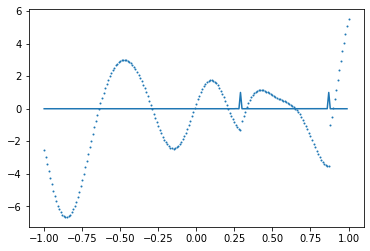

In [ ]:
x = np.linspace(-1, 1, 201)
plt.scatter(x, data, s= 1)
x = x[:-1]
plt.plot(x, pred)
plt.show()

In [ ]:
data, label = a.generate()

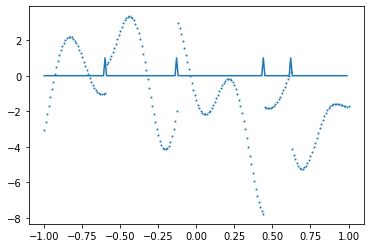

In [ ]:
data = np.array(data)
data = data.reshape((1, len(data), 1))
pred = model.predict(data)
data = data.reshape(201, )
pred = pred.reshape(200,)
x = np.linspace(-1, 1, 201)
plt.scatter(x, data, s = 1)
x = x[:-1]
plt.plot(x, pred)
plt.show()

# Saving the Model

In [ ]:
model.save('/content/gdrive/MyDrive/COL334_Assignments')

In [ ]:
import tensorflow as tf

kmodel = tf.keras.models.load_model('/content/gdrive/MyDrive/COL334_Assignments')

1/1 [==============================] - 0s 18ms/step


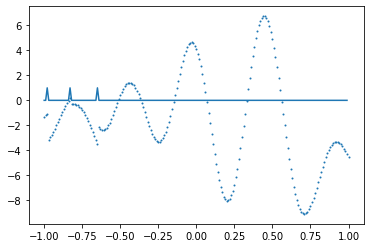

In [ ]:
import matplotlib.pyplot as plt
a = DiscontDataGenerator()
data, label = a.generate()
data = np.array(data)
data = data.reshape((1, len(data), 1))
pred = kmodel.predict(data)
data = data.reshape(201, )
pred = pred.reshape(200,)
x = np.linspace(-1, 1, 201)
plt.scatter(x, data, s = 1)
x = x[:-1]
plt.plot(x, pred)
plt.show()

In [ ]:
kmodel.save('/content')